In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 기본 경로 설정
%cd /content/drive/MyDrive/Colab Notebooks/2021-2 인공지능

/content/drive/MyDrive/Colab Notebooks/2021-2 인공지능


In [ ]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

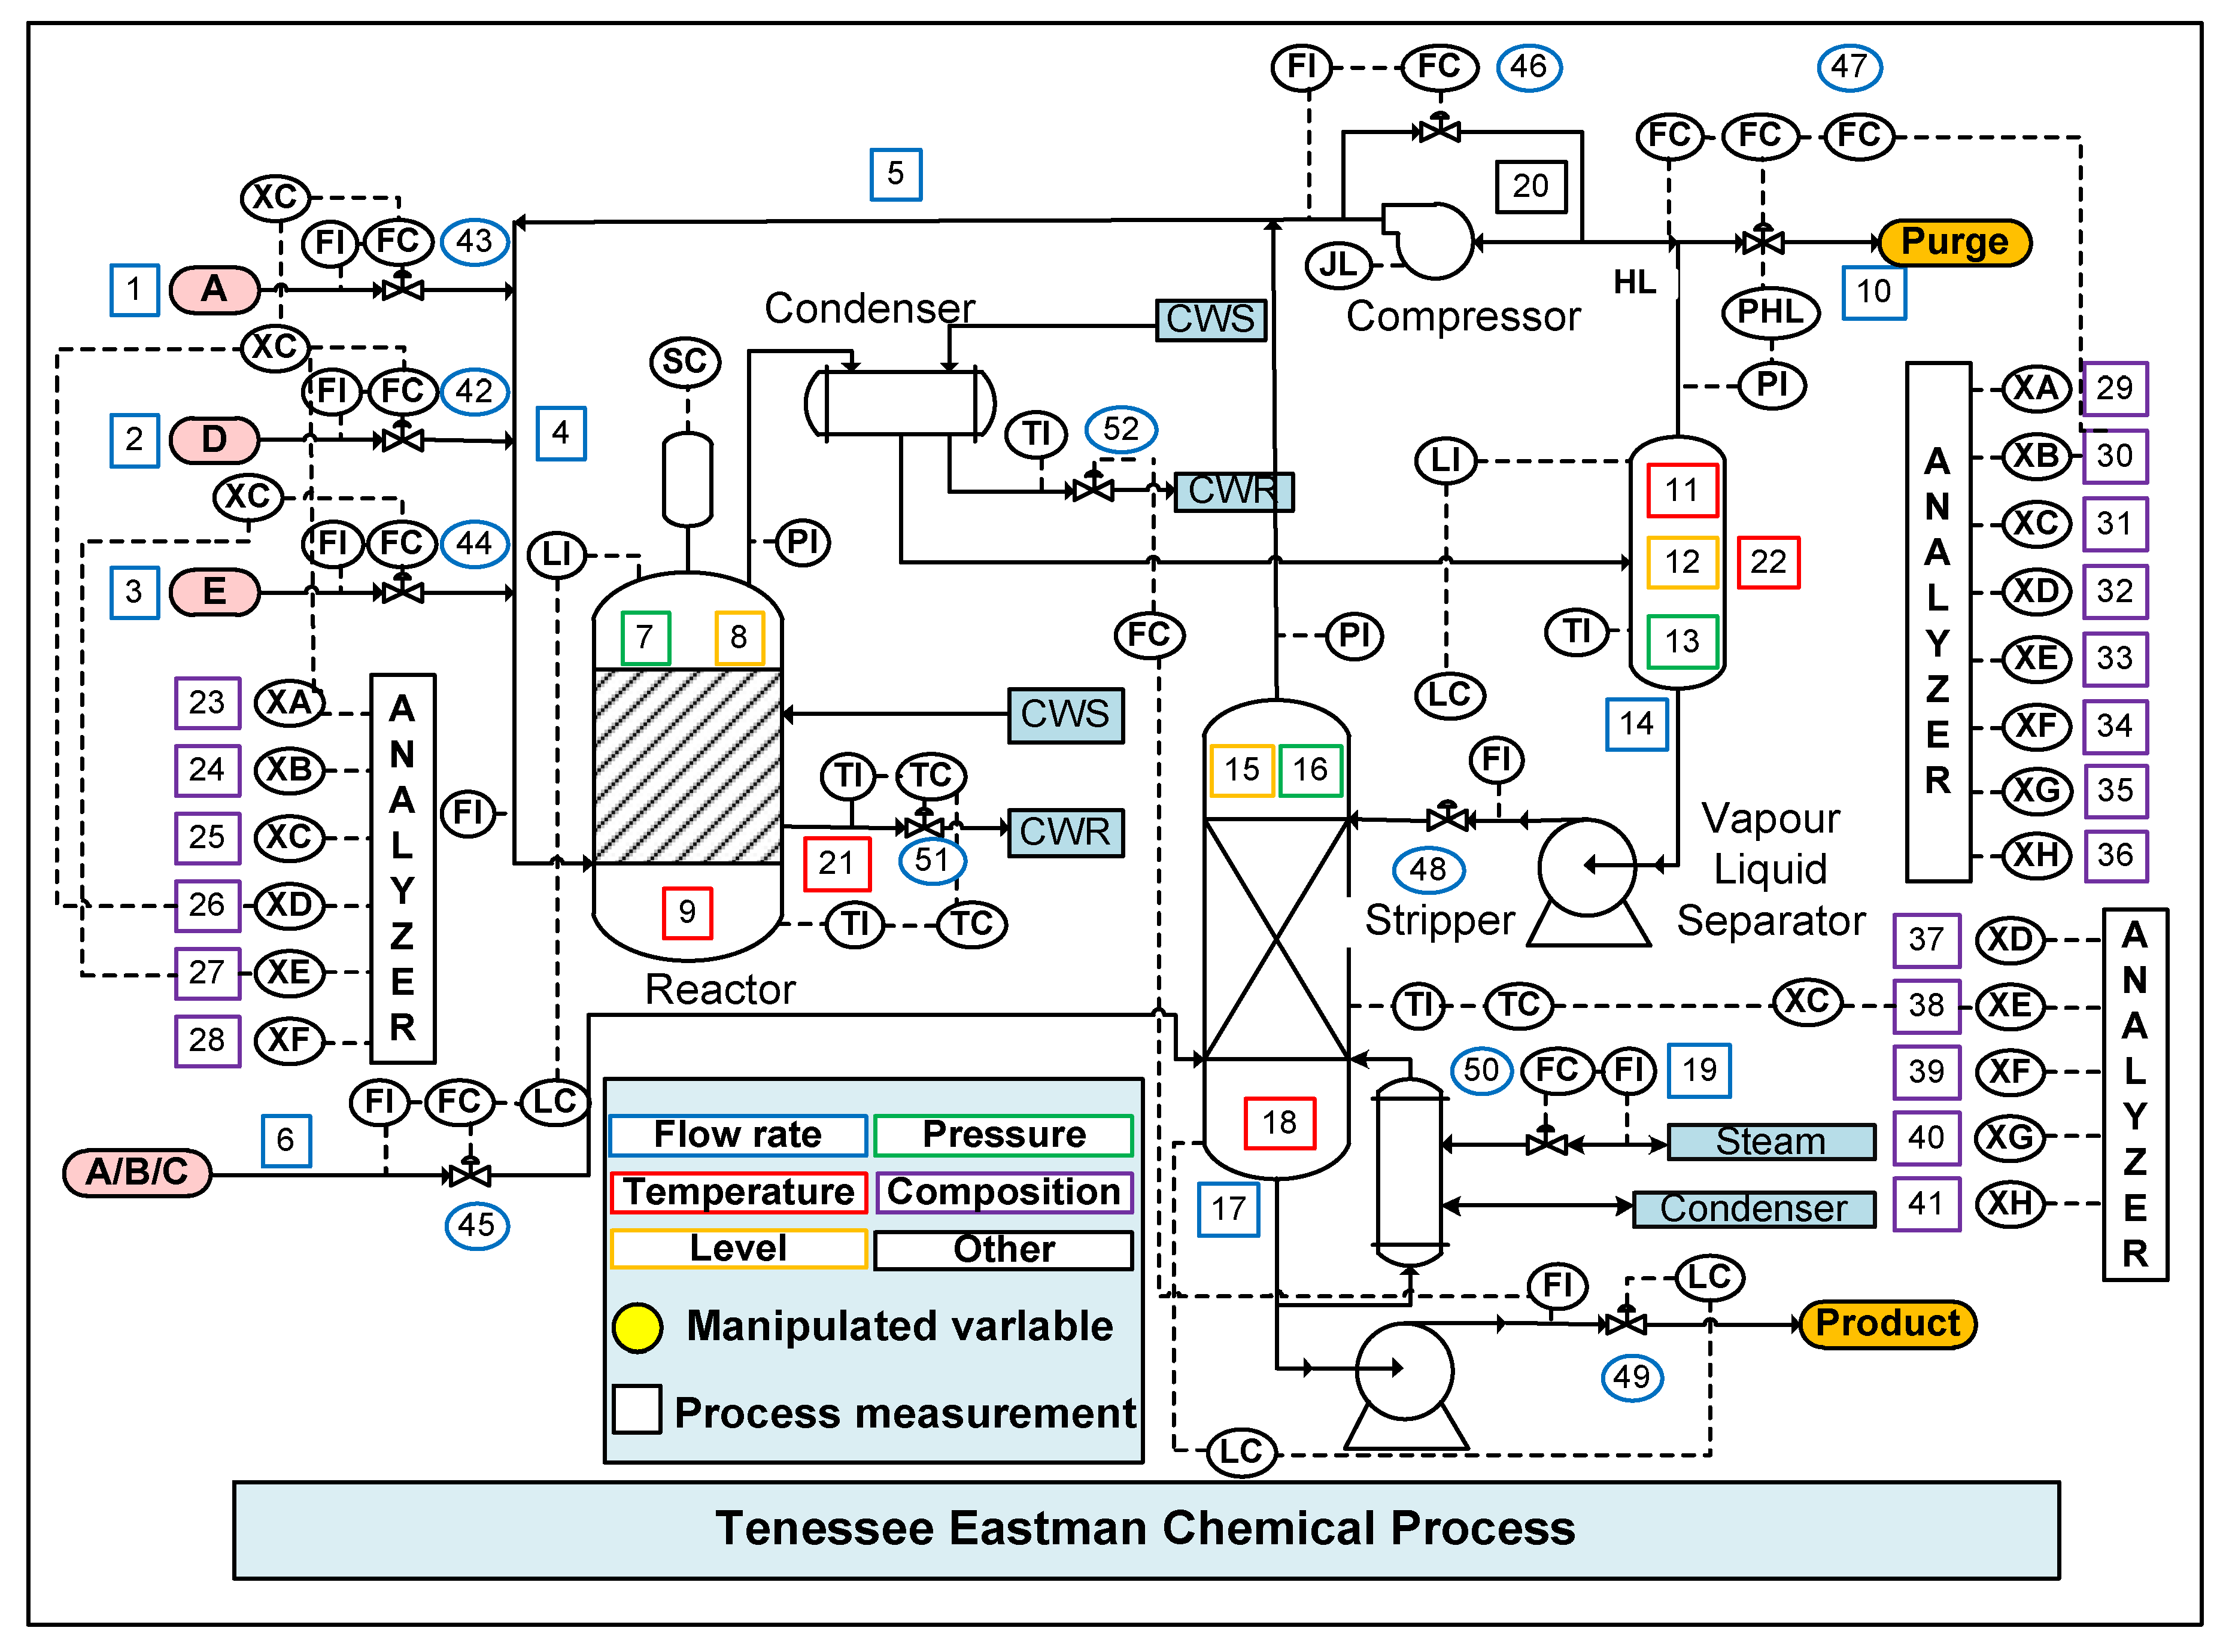

In [ ]:
from IPython.display import Image
Image('TEP.png')

In [ ]:
# 데이터 가져오기


,XMEAS 1,XMEAS 2,XMEAS 3,XMEAS 4,XMEAS 5,XMEAS 6,XMEAS 7,XMEAS 8,XMEAS 9,XMEAS 10,XMEAS 11,XMEAS 12,XMEAS 13,XMEAS 14,XMEAS 15,XMEAS 16,XMEAS 17,XMEAS 18,XMEAS 19,XMEAS 20,XMEAS 21,XMEAS 22,XMEAS 23,XMEAS 24,XMEAS 25,XMEAS 26,XMEAS 27,XMEAS 28,XMEAS 29,XMEAS 30,XMEAS 31,XMEAS 32,XMEAS 33,XMEAS 34,XMEAS 35,XMEAS 36,XMEAS 37,XMEAS 38,XMEAS 39,XMEAS 40,XMEAS 41,XMV 1,XMV 2,XMV 3,XMV 4,XMV 5,XMV 6,XMV 7,XMV 8,XMV 9,XMV 10,XMV 11,Fault
0,0.24889,3702.300049,4502.700195,9.4170,26.996000,42.182999,2705.199951,75.172997,120.400001,0.33611,80.068001,50.462002,2633.399902,25.184000,50.201000,3102.800049,22.617001,65.723999,228.649994,341.000000,94.592003,77.274002,32.188000,8.8933,26.382999,6.8820,18.775999,1.6567,32.958000,13.823,23.978001,1.2565,18.579,2.2633,4.8436,2.2986,0.017866,0.8357,0.098577,53.723999,43.827999,62.394001,54.058998,24.804001,63.269001,21.950001,40.188000,39.460999,47.000000,47.594002,41.383999,18.905001,0
1,0.24904,3666.199951,4526.000000,9.2682,26.709999,42.332001,2705.500000,74.411003,120.410004,0.33676,80.095001,51.905998,2634.399902,26.589001,49.824001,3102.199951,22.583000,65.725998,229.630005,341.440002,94.685997,77.383003,32.188000,8.8933,26.382999,6.8820,18.775999,1.6567,32.958000,13.823,23.978001,1.2565,18.579,2.2633,4.8436,2.2986,0.017866,0.8357,0.098577,53.723999,43.827999,63.014999,53.780998,24.790001,62.171001,22.239000,40.108002,43.709999,46.127998,47.507999,41.658001,18.976000,0
2,0.25034,3673.300049,4501.299805,9.4212,26.841999,42.360001,2705.300049,75.125000,120.410004,0.33739,80.198998,50.469002,2634.600098,24.493999,48.957001,3104.000000,23.591000,65.757004,228.440002,341.109985,94.568001,77.545998,32.222000,8.9441,26.076000,6.7883,18.672001,1.6665,33.011002,13.751,23.756001,1.1904,18.961,2.2628,4.8707,2.2701,0.017866,0.8357,0.098577,53.723999,43.827999,62.893002,54.075001,24.669001,61.584999,22.191000,40.029999,39.480000,44.120998,47.612000,41.721001,16.562000,0
3,0.25109,3657.800049,4497.799805,9.3792,26.528000,41.981998,2707.300049,73.991997,120.379997,0.33664,80.329002,48.215000,2635.899902,27.367001,49.708000,3104.699951,22.097000,65.787003,230.119995,341.339996,94.623001,77.569000,32.222000,8.9441,26.076000,6.7883,18.672001,1.6665,33.011002,13.751,23.756001,1.1904,18.961,2.2628,4.8707,2.2701,0.017866,0.8357,0.098577,53.723999,43.827999,63.160000,54.117001,24.594999,61.561001,21.959000,40.120998,32.848000,45.858002,47.459000,40.835999,20.094000,0
4,0.24563,3698.000000,4537.399902,9.3746,26.736000,42.354000,2705.300049,75.282997,120.419998,0.32521,80.129997,49.518002,2634.100098,22.341000,49.661999,3103.500000,22.854000,65.790001,230.089996,341.239990,94.399002,77.157997,32.198002,8.9947,26.188000,6.9876,18.652000,1.6479,33.387001,13.796,23.854000,1.1715,18.900,2.2754,4.8080,2.2547,0.017866,0.8357,0.098577,53.723999,43.827999,63.334000,53.905998,24.451000,61.388000,22.271000,39.537998,36.681999,45.752998,47.458000,41.727001,18.330000,0


In [ ]:
# 데이터 통계량 요약


,XMEAS 1,XMEAS 2,XMEAS 3,XMEAS 4,XMEAS 5,XMEAS 6,XMEAS 7,XMEAS 8,XMEAS 9,XMEAS 10,XMEAS 11,XMEAS 12,XMEAS 13,XMEAS 14,XMEAS 15,XMEAS 16,XMEAS 17,XMEAS 18,XMEAS 19,XMEAS 20,XMEAS 21,XMEAS 22,XMEAS 23,XMEAS 24,XMEAS 25,XMEAS 26,XMEAS 27,XMEAS 28,XMEAS 29,XMEAS 30,XMEAS 31,XMEAS 32,XMEAS 33,XMEAS 34,XMEAS 35,XMEAS 36,XMEAS 37,XMEAS 38,XMEAS 39,XMEAS 40,XMEAS 41,XMV 1,XMV 2,XMV 3,XMV 4,XMV 5,XMV 6,XMV 7,XMV 8,XMV 9,XMV 10,XMV 11,Fault
count,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000
mean,0.256532,3663.879388,4508.703822,9.402836,26.902459,42.384153,2726.636849,74.766053,120.401563,0.344920,79.672202,49.974227,2654.779541,25.097449,49.947387,3124.252377,22.899224,66.020652,248.055320,341.000447,94.400332,77.100735,32.024448,8.854892,26.854875,6.863946,18.630727,1.622499,32.710608,13.772349,24.684431,1.245980,18.355179,2.214336,4.764021,2.259621,0.017769,0.833794,0.097101,53.700602,43.823953,64.445078,54.858435,29.684086,64.351380,21.788686,39.086630,38.024163,46.412239,49.430993,42.737051,20.865093,10.357086
std,0.145361,43.766306,111.694789,0.403952,0.228499,0.338538,82.449995,1.363031,0.072065,0.083460,1.867076,0.995480,83.544595,1.059524,1.006803,83.354803,0.639988,1.744552,70.903902,12.015744,1.317784,1.189541,1.856877,0.236831,1.973783,0.144321,1.100921,0.135068,2.807251,0.301173,3.022147,0.159388,1.547002,0.184183,0.364075,0.189627,0.010062,0.098962,0.013898,0.599167,0.621837,6.168185,8.019043,20.085815,9.765573,6.564505,13.808984,2.929580,2.330026,17.777168,13.289908,11.737899,6.417475
min,-0.002739,3430.899902,3851.899902,7.560200,25.584999,40.723000,2488.300049,65.443001,119.690002,0.118740,72.736000,46.400002,2399.500000,20.787001,44.862000,2923.399902,20.263000,56.365002,26.107000,273.420013,80.459999,64.843002,23.823000,7.547700,20.399000,6.144200,12.823000,0.928620,20.549999,12.259000,15.021000,0.395870,10.489000,1.303900,3.352000,1.431600,-0.016855,0.444140,0.032736,51.161999,41.446999,59.758999,27.566999,0.000000,47.789001,-0.045435,0.000000,27.504000,34.644001,-0.581240,-0.138150,12.187000,0.000000
25%,0.217508,3635.399902,4472.899902,9.272400,26.767000,42.192001,2697.600098,74.356003,120.379997,0.322257,79.793749,49.252748,2625.275025,24.378000,49.264000,3096.100098,22.417000,65.388000,222.289993,339.339996,94.429001,76.989998,31.909000,8.786700,26.153999,6.790300,18.514999,1.627100,32.605999,13.703000,23.697001,1.177500,18.261999,2.231500,4.767200,2.242400,0.011149,0.816710,0.090027,53.316002,43.432999,62.653000,53.542999,22.146999,60.415001,21.422001,38.241001,35.900751,44.830002,44.955751,40.625000,17.199750,5.000000
50%,0.250250,3663.300049,4510.799805,9.355400,26.897500,42.351002,2705.600098,74.924004,120.400001,0.335620,80.084000,50.004002,2634.000000,25.122000,49.883999,3102.800049,22.902000,65.890999,234.529999,341.290008,94.583000,77.264000,32.178001,8.881100,26.441000,6.874350,18.777500,1.654100,32.936001,13.809000,24.059000,1.256000,18.577999,2.261200,4.838500,2.295450,0.017792,0.835980,0.097967,53.712002,43.818001,63.108002,53.995499,25.155500,61.428501,22.112000,39.888000,38.110500,46.266998,48.266998,41.220001,18.334999,10.000000
75%,0.281593,3690.699951,4550.500000,9.454400,27.041000,42.528000,2714.699951,75.421997,120.419998,0.347670,80.346001,50.625000,2643.399902,25.797001,50.627998,3110.600098,23.334999,66.516998,250.362499,342.890015,94.732002,77.523003,32.45200

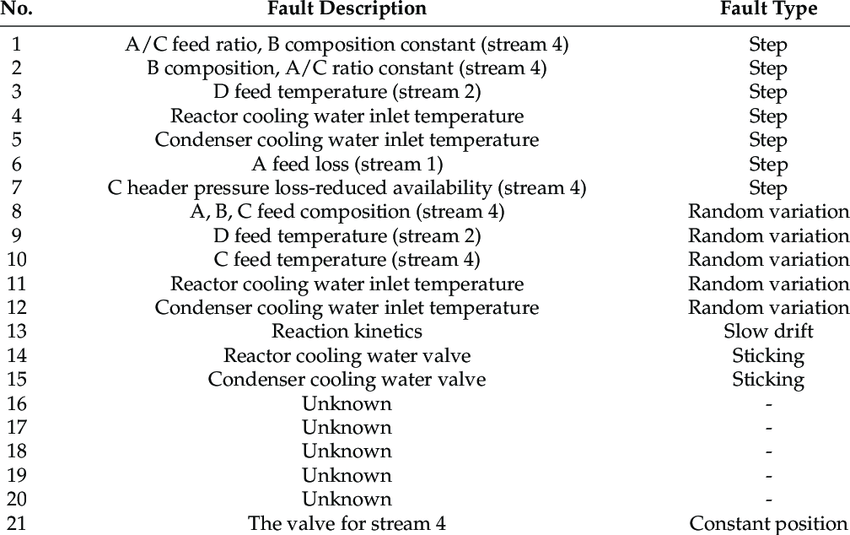

In [ ]:
from IPython.display import Image
Image('TEP faults.png')

In [ ]:
# 입력/출력 차원 설정


,XMEAS 1,XMEAS 2,XMEAS 3,XMEAS 4,XMEAS 5,XMEAS 6,XMEAS 7,XMEAS 8,XMEAS 9,XMEAS 10,XMEAS 11,XMEAS 12,XMEAS 13,XMEAS 14,XMEAS 15,XMEAS 16,XMEAS 17,XMEAS 18,XMEAS 19,XMEAS 20,XMEAS 21,XMEAS 22,XMEAS 23,XMEAS 24,XMEAS 25,XMEAS 26,XMEAS 27,XMEAS 28,XMEAS 29,XMEAS 30,XMEAS 31,XMEAS 32,XMEAS 33,XMEAS 34,XMEAS 35,XMEAS 36,XMEAS 37,XMEAS 38,XMEAS 39,XMEAS 40,XMEAS 41,XMV 1,XMV 2,XMV 3,XMV 4,XMV 5,XMV 6,XMV 7,XMV 8,XMV 9,XMV 10,XMV 11
Fault,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
1,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120
2,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120
3,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120
4,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120
5,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120
6,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120
7,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120
8,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120


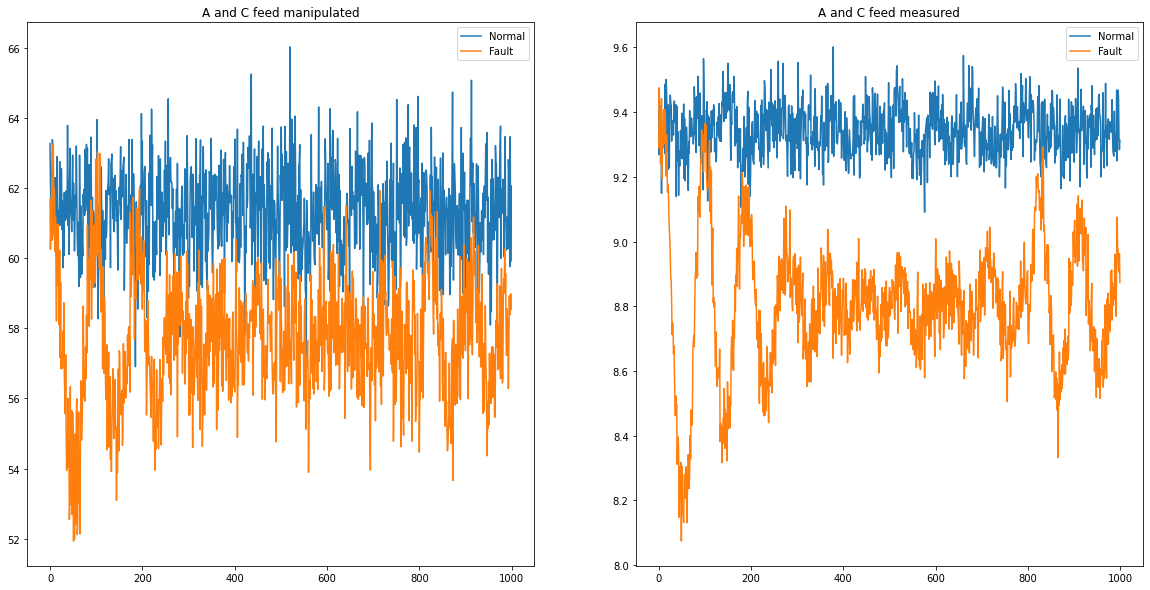

In [ ]:
import numpy as np
data_normal = data[data['Fault']==0]
data_fault1 = data[data['Fault']==1]
len = 1000
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(np.arange(len), data_normal['XMV 4'][:len], label='Normal')
plt.plot(np.arange(len), data_fault1['XMV 4'][:len], label='Fault')
plt.title('A and C feed manipulated')
plt.legend()
plt.subplot(1,2,2)
plt.plot(np.arange(len), data_normal['XMEAS 4'][:len], label='Normal')
plt.plot(np.arange(len), data_fault1['XMEAS 4'][:len], label='Fault')
plt.title('A and C feed measured')
plt.legend()

In [ ]:
# 데이터 분리 (train/test)


(19984, 52) (19984,)
(4996, 52) (4996,)


In [ ]:
# 데이터 스케일 조정
from sklearn.preprocessing import MinMaxScaler


In [ ]:
# 원핫인코딩
from sklearn.preprocessing import OneHotEncoder


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# DNN 모델 만들기
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3392      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32)               

In [ ]:
# 모델 학습
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import SGD, Adam


Epoch 1/20
125/125 [==============================] - 3s 9ms/step - loss: 2.5781 - accuracy: 0.2444 - val_loss: 2.8455 - val_accuracy: 0.2339
Epoch 2/20
125/125 [==============================] - 1s 5ms/step - loss: 2.1000 - accuracy: 0.3523 - val_loss: 2.3606 - val_accuracy: 0.3375
Epoch 3/20
125/125 [==============================] - 1s 5ms/step - loss: 1.8950 - accuracy: 0.4045 - val_loss: 2.0042 - val_accuracy: 0.3868
Epoch 4/20
125/125 [==============================] - 1s 5ms/step - loss: 1.7365 - accuracy: 0.4517 - val_loss: 1.8195 - val_accuracy: 0.4298
Epoch 5/20
125/125 [==============================] - 1s 4ms/step - loss: 1.6027 - accuracy: 0.4878 - val_loss: 1.9389 - val_accuracy: 0.4031
Epoch 6/20
125/125 [==============================] - 1s 4ms/step - loss: 1.4941 - accuracy: 0.5242 - val_loss: 2.0953 - val_accuracy: 0.3958
Epoch 7/20
125/125 [==============================] - 1s 4ms/step - loss: 1.4010 - accuracy: 0.5575 - val_loss: 2.1368 - val_accuracy: 0.4298
Epoch 

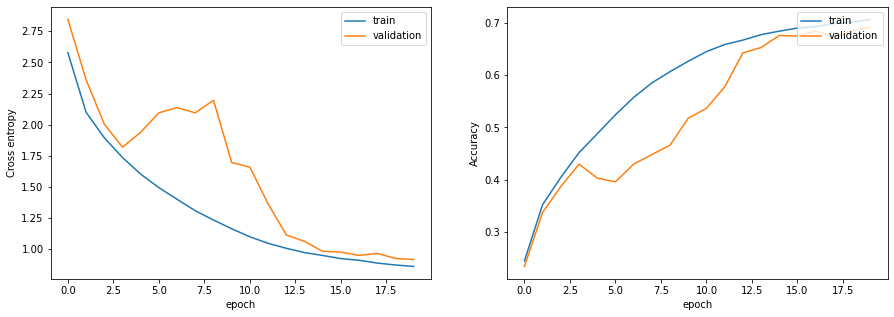

In [ ]:
# 학습 커브 (Learning curve)
history = history.history
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.ylabel('Cross entropy', fontsize=10)
plt.xlabel('epoch', fontsize=10)
plt.legend(['train', 'validation'], loc='upper right', fontsize=10)
plt.subplot(1,2,2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.ylabel('Accuracy', fontsize=10)
plt.xlabel('epoch', fontsize=10)
plt.legend(['train', 'validation'], loc='upper right', fontsize=10)

In [ ]:
# 모델 불러오기 
from keras.models import load_model


In [ ]:
# 분류 모델 정확도 계산
from sklearn.metrics import accuracy_score


0.6819455564451561


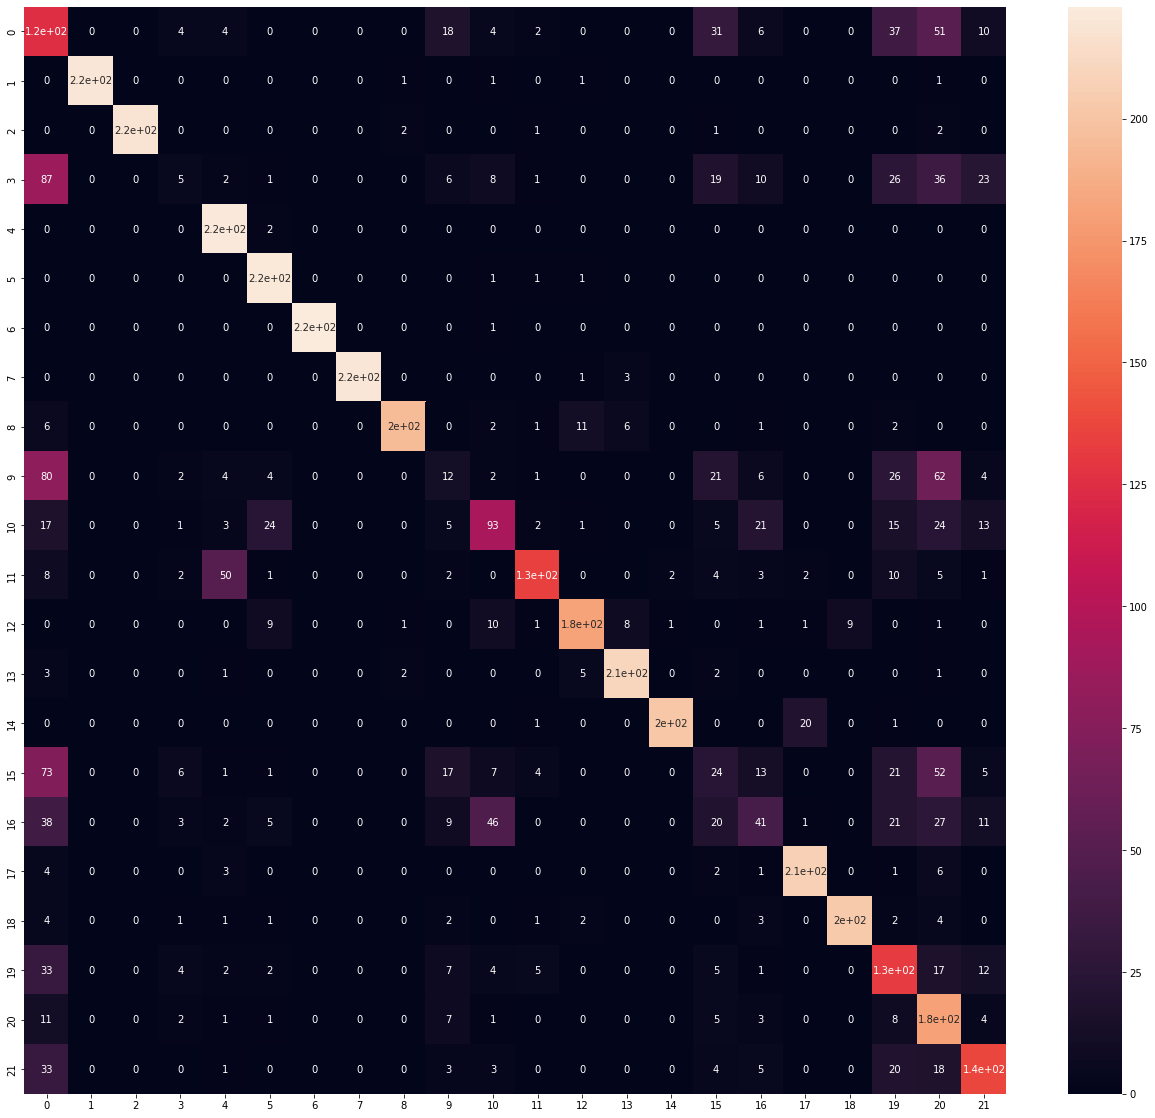

In [ ]:
# Confusion matrix 
from sklearn.metrics import confusion_matrix
